Bài toán: đầu vào là một bảng gồm 3 cột, cột 1 là lương, cột 2 là thời gian làm việc, cột 3 là cho vay hay không (0, 1)

In [ ]:
!git clone https://github.com/nttuan8/DL_Tutorial.git

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#sigmoid
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [ ]:
# load data tu file
data = pd.read_csv('/content/DL_Tutorial/L2/dataset.csv').values

In [ ]:
print(data)

[[10.    1.    1.  ]
 [ 5.    2.    1.  ]
 [ 6.    1.8   1.  ]
 [ 7.    1.    1.  ]
 [ 8.    2.    1.  ]
 [ 9.    0.5   1.  ]
 [ 4.    3.    1.  ]
 [ 5.    2.5   1.  ]
 [ 8.    1.    1.  ]
 [ 4.    2.5   1.  ]
 [ 8.    0.1   0.  ]
 [ 7.    0.15  0.  ]
 [ 4.    1.    0.  ]
 [ 5.    0.8   0.  ]
 [ 7.    0.3   0.  ]
 [ 4.    1.    0.  ]
 [ 5.    0.5   0.  ]
 [ 6.    0.3   0.  ]
 [ 7.    0.2   0.  ]
 [ 8.    0.15  0.  ]]


In [ ]:
l, d = data.shape

In [ ]:
print(l, d)

20 3


In [ ]:
X1 = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)

print(X1)
print(y)

[[10.    1.  ]
 [ 5.    2.  ]
 [ 6.    1.8 ]
 [ 7.    1.  ]
 [ 8.    2.  ]
 [ 9.    0.5 ]
 [ 4.    3.  ]
 [ 5.    2.5 ]
 [ 8.    1.  ]
 [ 4.    2.5 ]
 [ 8.    0.1 ]
 [ 7.    0.15]
 [ 4.    1.  ]
 [ 5.    0.8 ]
 [ 7.    0.3 ]
 [ 4.    1.  ]
 [ 5.    0.5 ]
 [ 6.    0.3 ]
 [ 7.    0.2 ]
 [ 8.    0.15]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
x1 = np.ones((l, 1))
x = np.hstack((x1, X1))
print(x)

[[ 1.   10.    1.  ]
 [ 1.    5.    2.  ]
 [ 1.    6.    1.8 ]
 [ 1.    7.    1.  ]
 [ 1.    8.    2.  ]
 [ 1.    9.    0.5 ]
 [ 1.    4.    3.  ]
 [ 1.    5.    2.5 ]
 [ 1.    8.    1.  ]
 [ 1.    4.    2.5 ]
 [ 1.    8.    0.1 ]
 [ 1.    7.    0.15]
 [ 1.    4.    1.  ]
 [ 1.    5.    0.8 ]
 [ 1.    7.    0.3 ]
 [ 1.    4.    1.  ]
 [ 1.    5.    0.5 ]
 [ 1.    6.    0.3 ]
 [ 1.    7.    0.2 ]
 [ 1.    8.    0.15]]


In [ ]:
w = np.array([0, 0.1, 0.1]).reshape(-1, 1)
print(w)

[[0. ]
 [0.1]
 [0.1]]


In [ ]:
a = []
w1 = []
learning_rate = 0.01

In [ ]:
for i in range(1000):
  y_predict = sigmoid(np.dot(x, w))
  x_predict = - np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1 - y, np.log(1 - y_predict)))
  w = w - learning_rate*np.dot(x.T, y_predict - y)
  w1.append(w)

  a.append(x_predict)


In [ ]:
print(w1[0:10])


[array([[-7.26538501],
       [ 0.6307005 ],
       [ 3.64648171]]), array([[-7.26965528],
       [ 0.63117445],
       [ 3.64787608]]), array([[-7.27392242],
       [ 0.63164803],
       [ 3.64926967]]), array([[-7.27818642],
       [ 0.63212126],
       [ 3.65066248]]), array([[-7.2824473 ],
       [ 0.63259412],
       [ 3.6520545 ]]), array([[-7.28670505],
       [ 0.63306662],
       [ 3.65344575]]), array([[-7.29095968],
       [ 0.63353876],
       [ 3.65483621]]), array([[-7.2952112 ],
       [ 0.63401055],
       [ 3.65622589]]), array([[-7.29945961],
       [ 0.63448197],
       [ 3.65761479]]), array([[-7.30370491],
       [ 0.63495303],
       [ 3.65900291]])]


In [ ]:
print(w)

[[-7.2611116 ]
 [ 0.63022619]
 [ 3.64508655]]


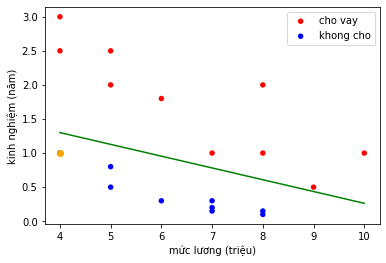

In [ ]:
t = 0.5
plt.scatter(X1[:10, 0], X1[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(X1[10:, 0], X1[10:, 1], c='blue', edgecolors='none', s=30, label='khong cho')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
# (4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g'
plt.plot((4, 10), (-(w[0]+4*w[1]+np.log(1/t- 1))/w[2], -(w[0] + 10*w[1] + np.log(1/t - 1))/w[2]), 'g')
plt.scatter(4, 1, c='orange')

plt.show()

In [ ]:
x2 = w[0] + 4*w[1] + 1*w[2]
print(sigmoid(x2))

[0.25065532]
